In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("creditcard.csv")

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64
Class
0.0    19812
1.0       85
Name: count, dtype: int64


<Axes: ylabel='count'>

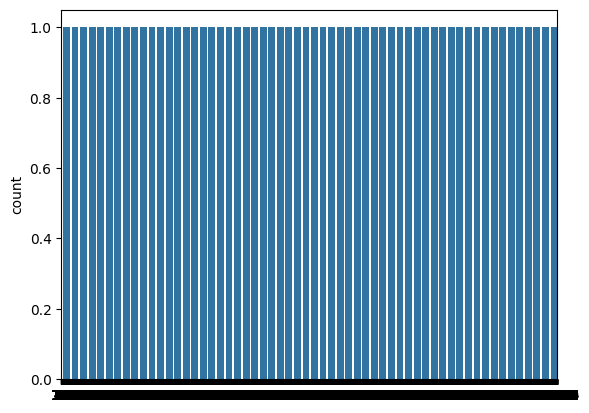

In [2]:
# Check for missing values
print(df.isnull().sum())

# Check the distribution of classes
print(df['Class'].value_counts())

# Visualize the class distribution
import seaborn as sns
sns.countplot(df['Class'])

In [3]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Handle class imbalance (e.g., using SMOTE)
X = df.drop('Class', axis=1)
y = df['Class']
# Drop rows with NaN values in 'Class' column
df = df.dropna(subset=['Class'])  # This line added to remove NaN

X = df.drop('Class', axis=1)
y = df['Class']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3940
         1.0       1.00      1.00      1.00      3985

    accuracy                           1.00      7925
   macro avg       1.00      1.00      1.00      7925
weighted avg       1.00      1.00      1.00      7925

ROC-AUC Score: 0.9997461928934009


In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
